In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for Files/combinedNetflixData.txt', names = ['CustID', 'Ratings'],usecols = [0,1], header = None)


In [ ]:
df

,CustID,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


**Shape of the data**

In [ ]:
df.shape

(24058263, 2)

**Total Movies**



In [ ]:
total_movie_count = df['Ratings'].isna().sum()
total_movie_count

4499

In [ ]:
print(f"The number of movies that are present: {total_movie_count}")

The number of movies that are present: 4499


**Total Customers**

In [ ]:
customer_count = df['CustID'].nunique() - total_movie_count
customer_count

470758

In [ ]:
df['CustID'].nunique()

475257

In [ ]:
475257 - 470758

4499

In [ ]:
print(f"The number of customers that are present: {customer_count}")

The number of customers that are present: 470758


In [ ]:
df_nan = pd.DataFrame(pd.isnull(df['Ratings']))
df_nan

,Ratings
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
df_nan = df_nan[df_nan['Ratings'] == True]
df_nan

,Ratings
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df.iloc[24057834]

,24057834
CustID,4499:
Ratings,NaN


**Total number of Ratings**

In [ ]:
total_ratings = df['Ratings'].count() - total_movie_count
total_ratings

24049265

*Individual Ratings*

In [ ]:
df['Ratings'].value_counts()

,count
Ratings,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


In [ ]:
stars = df.groupby('Ratings')['Ratings'].agg(['count'])
stars

,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


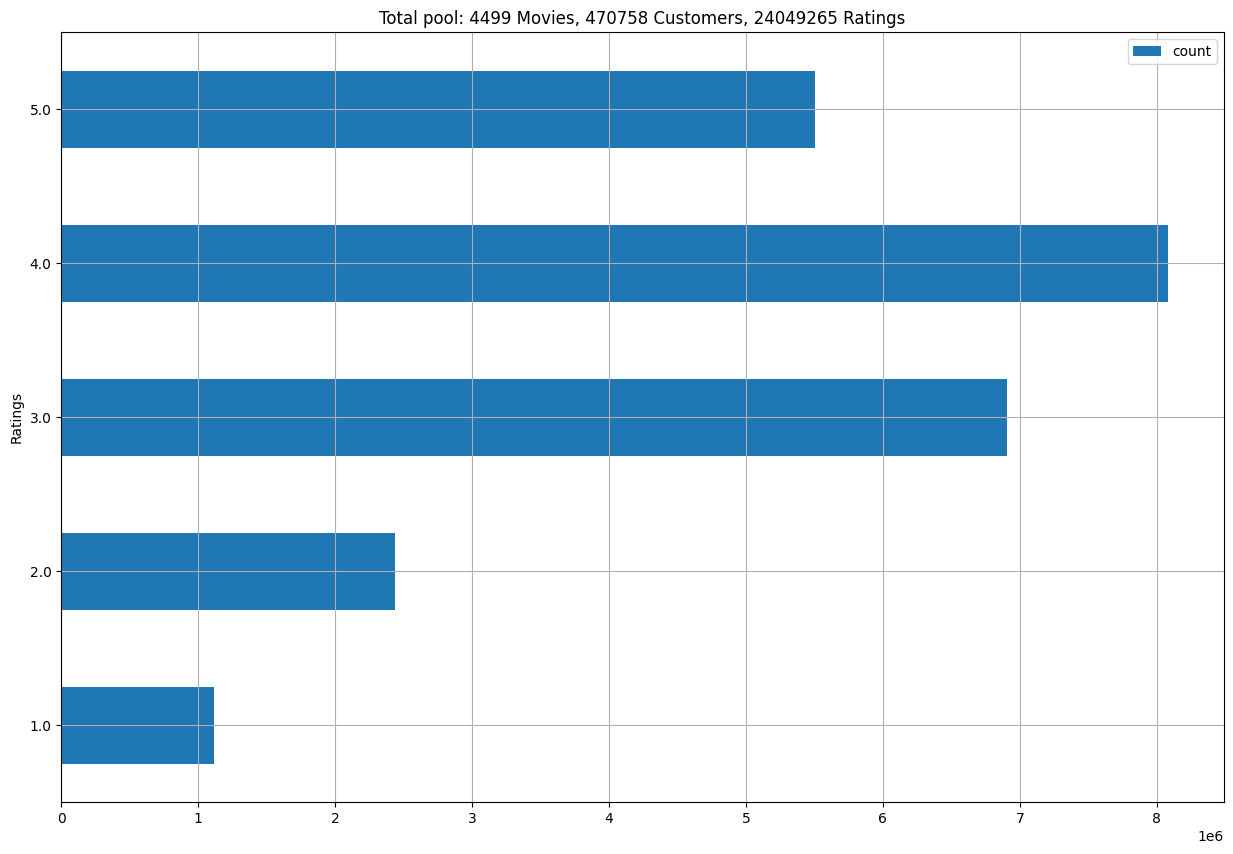

In [ ]:
ax = stars.plot(kind= 'barh', legend = True, figsize = (15,10))
plt.title(f'Total pool: {total_movie_count} Movies, {customer_count} Customers, {total_ratings} Ratings')
plt.grid(True)
plt.show()

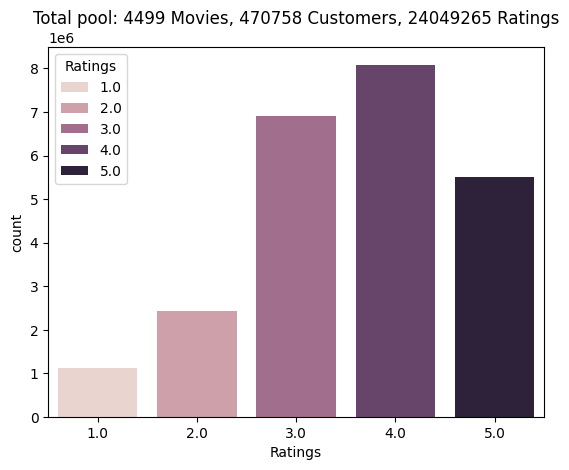

In [ ]:
sns.barplot(x = stars.index, y = stars['count'], hue = stars.index)
plt.title(f'Total pool: {total_movie_count} Movies, {customer_count} Customers, {total_ratings} Ratings')
plt.show()

**Segregation of the data**

In [ ]:
current_movie_id = None
movie_id = []

for cust_id in df['CustID']:
  if ':' in cust_id:
    current_movie_id = int(cust_id.replace(':',''))
  movie_id.append(current_movie_id)

In [ ]:
len(movie_id)

24058263

In [ ]:
movie_id[-1]

4499

In [ ]:
temp = df.copy()

In [ ]:
temp['Movie_id'] = movie_id
temp

,CustID,Ratings,Movie_id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
temp = temp[temp['Ratings'].notna()]
temp

,CustID,Ratings,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
df = temp.copy()

**Preparation from Collabrative Filtering**

**Benchmark 1 - Removing the least rated movies**

In [ ]:
movie_list = df.groupby('Movie_id')['Ratings'].agg('count')
movie_list

,Ratings
Movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
movie_list.quantile(0.7)

1798.6

In [ ]:
benchmark_movies = round(movie_list.quantile(0.7),0)

In [ ]:
drop_list_movies = movie_list[movie_list.values < benchmark_movies].index

In [ ]:
drop_list_movies

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_id', length=3149)

**Benchmark 2 - Least active customers**

In [ ]:
cust_list = df.groupby('CustID')['Ratings'].agg('count')
cust_list

,Ratings
CustID,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [ ]:
benchmark_customer = round(cust_list.quantile(0.7), 0)

In [ ]:
benchmark_customer

52.0

In [ ]:
drop_list_cust = cust_list[ cust_list.values < benchmark_customer].index

In [ ]:
drop_list_cust

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='CustID', length=327300)

**Removing both benchmarks from the original data**

In [ ]:
df.columns

Index(['CustID', 'Ratings', 'Movie_id'], dtype='object')

In [ ]:
df['CustID'].unique()

array(['1488844', '822109', '885013', ..., '1017887', '72311', '594210'],
      dtype=object)

*Dropping least rated movies*

In [ ]:
df = df[~df['Movie_id'].isin(drop_list_movies)]

In [ ]:
df.shape

(22629885, 3)

*Dropping Dummy Customers*

In [ ]:
df = df[~df['CustID'].isin(drop_list_cust)]

In [ ]:
df.shape

(17337458, 3)

**Importing secondary data**

In [ ]:
movie_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data for Files/NetflixMovieData.csv', names = ['Movie_Id', 'Year', 'Name'], usecols = [0,1,2], header = None)

In [ ]:
movie_df

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
movie_df = movie_df.set_index('Movie_Id')

In [ ]:
movie_df

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
!pip install scikit.surprise

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader  = Reader()

In [ ]:
data = Dataset.load_from_df(df[['CustID', 'Movie_id', 'Ratings']][:100000], reader)

In [ ]:
data

**Model Building**

In [ ]:
model = SVD()

In [ ]:
cross_validate(model, data, measures = ['RMSE'], cv =4)

{'test_rmse': array([0.9992686 , 1.00026378, 0.99413245, 0.99722459]),
 'fit_time': (3.1026611328125,
  4.528214454650879,
  5.064796209335327,
  5.582603454589844),
 'test_time': (0.24547362327575684,
  0.6313924789428711,
  1.736933946609497,
  0.14154553413391113)}

In [ ]:
data_712664 = df[(df['CustID'] == '712664') & (df['Ratings'] == 5)]
data_712664

,CustID,Ratings,Movie_id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [ ]:
movie_df

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
list_of_infinite_possibility = movie_df.copy()

In [ ]:
list_of_infinite_possibility

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
list_of_infinite_possibility.reset_index(inplace = True)

In [ ]:
list_of_infinite_possibility = list_of_infinite_possibility[~list_of_infinite_possibility['Movie_Id'].isin(drop_list_movies)]

In [ ]:
list_of_infinite_possibility

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
list_of_infinite_possibility['Estimate_Score'] = list_of_infinite_possibility['Movie_Id'].apply(lambda x: model.predict('712664', x).est)

<ipython-input-63-36e5a6ef2a65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_infinite_possibility['Estimate_Score'] = list_of_infinite_possibility['Movie_Id'].apply(lambda x: model.predict('712664', x).est)


In [ ]:
list_of_infinite_possibility

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.984325
7,8,2004.0,What the #$*! Do We Know!?,3.235042
15,16,1996.0,Screamers,3.664175
16,17,2005.0,7 Seconds,2.975873
17,18,1994.0,Immortal Beloved,3.760251
...,...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.678188
17765,17767,2004.0,Fidel Castro: American Experience,3.678188
17766,17768,2000.0,Epoch,3.678188
17767,17769,2003.0,The Company,3.678188
